In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import unittest
import matplotlib as mpl
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime

In [ ]:
register_matplotlib_converters()

##### Reading Data

In [48]:
def parse_date(x):
    return datetime.strptime(x, "%Y-%m-%d")

In [49]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=["date"], parse_dates=["date"], date_parser=parse_date,)
df

C:\Users\User\AppData\Local\Temp\ipykernel_3764\594555334.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("fcc-forum-pageviews.csv", index_col=["date"], parse_dates=["date"], date_parser=parse_date,)


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


##### Cleaning Data

In [50]:
# Filtering out top 2.5% and bottom 2.5% of the dataset

lower_quantile = df["value"].quantile(2.5/100)
lower_quantile


17876.4

In [51]:
upper_quantile = df["value"].quantile((100-2.5)/100)
upper_quantile

177613.075

In [52]:
# Cleaning data to get the in between the two ranges

df = df[(df["value"]>= lower_quantile) & (df["value"]<= upper_quantile)]

##### Draw Line Plot

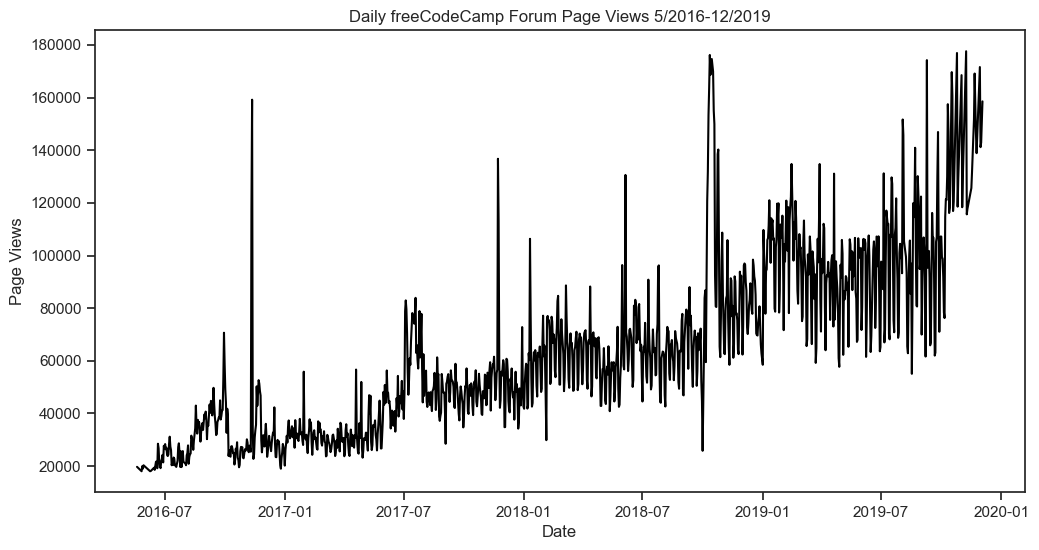

In [60]:
# Draw Line Plot
def draw_line_plot():
    x = df.index
    y = df["value"]
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color = "black")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.show()

draw_line_plot()

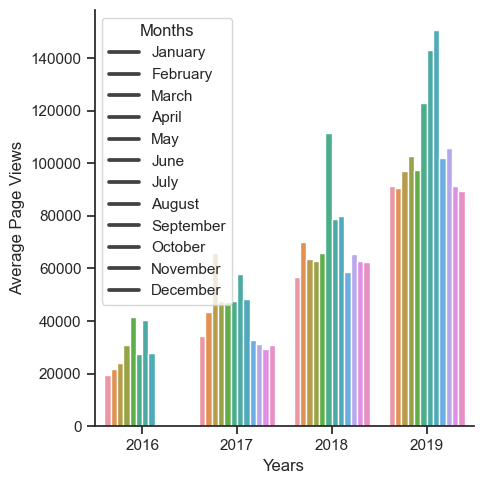

In [56]:
#### Draw bar Plot

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = (
        df.copy()
        .groupby(pd.Grouper(freq="M"))
        .mean()
        .rename(columns={"value": "avg"})
    )

    df_bar["year"] = pd.DatetimeIndex(df_bar.index).year
    df_bar["month"] = pd.DatetimeIndex(df_bar.index).strftime("%B")

    # Convert data to long form
    df_bar = pd.melt(
        df_bar,
        id_vars=["year", "month"],
        value_vars=["avg"],
    )

    sns.set_theme(style="ticks")

    # Draw the chart
    fig = sns.catplot(
        data=df_bar,
        x="year",
        y="value",
        hue="month",
        kind="bar",
        legend=False,
    )

    # Config legend, axes and title
    fig.set_xlabels("Years")
    fig.set_ylabels("Average Page Views")
    plt.legend(
        title="Months",
        loc="upper left",
        labels=[
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ],
    )
    return fig

draw_bar_plot()

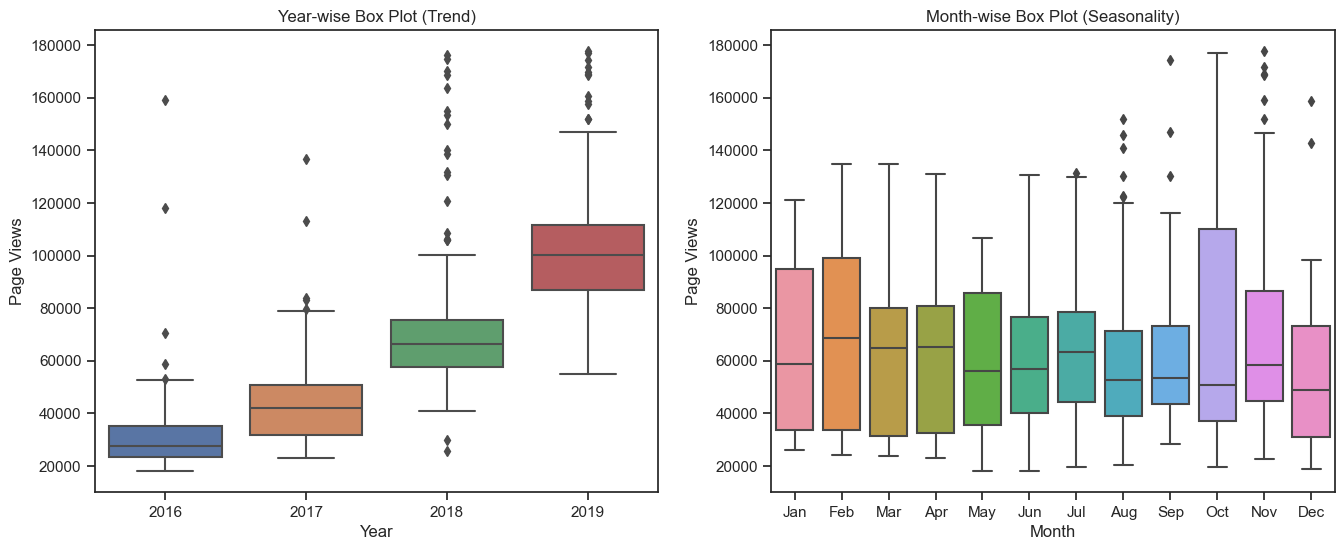

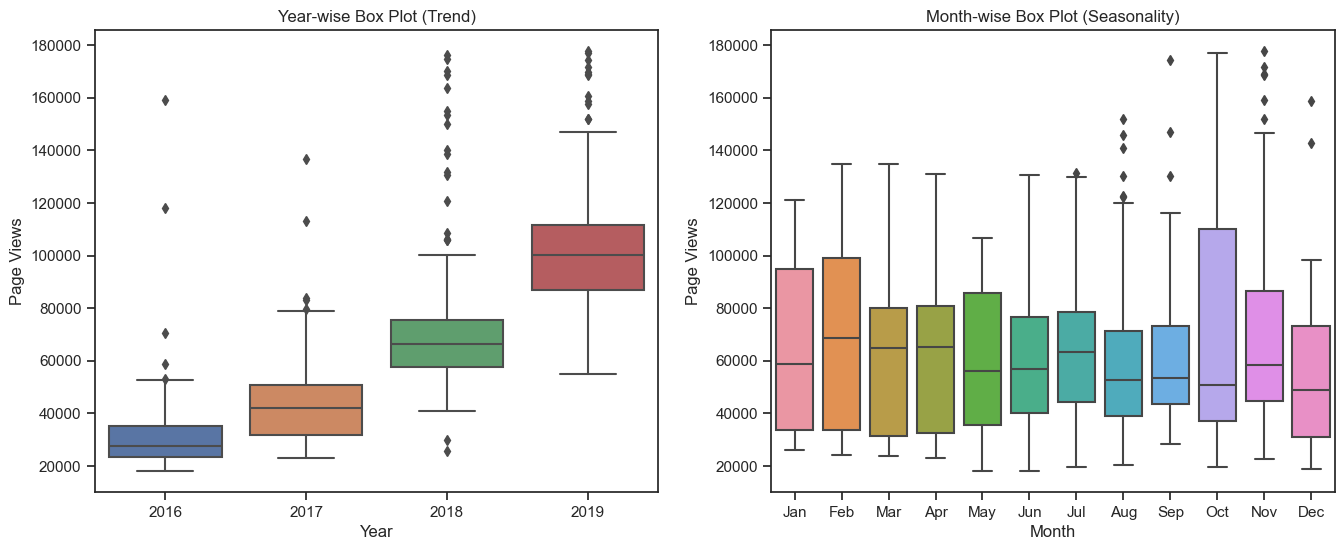

In [57]:
### Draw Box Plot

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().rename(columns={"value": "views"})
    df_box.reset_index(inplace=True)

    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"])

    # Remember to edit the labels after call to seaborn.
    ax1.set(
        xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
    )

    sns.boxplot(
        ax=ax2,
        data=df_box,
        x=df_box["month"],
        y=df_box["views"],
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )

    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")

    # I'm cheating here, because I don't know why the test for y ticks label
    # fail and I don't want to dig into seaborn source code.
    y_ticks = [
        "0",
        "20000",
        "40000",
        "60000",
        "80000",
        "100000",
        "120000",
        "140000",
        "160000",
        "180000",
        "200000",
    ]
    ax1.yaxis.set_major_locator(mticker.FixedLocator([int(s) for s in y_ticks]))
    ax1.set_yticklabels(y_ticks)
    return fig

draw_box_plot()

## FUHHHHHHHHHH !!!!! ACCOMPLISHED !!!